<a href="https://colab.research.google.com/github/pullz6/Anime_Recommendor/blob/main/Anime_Recs_Model_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anime Recommendor Model

In [1]:
!pip install kaggle

Getting the Kaggle Dataset of Anime

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download -d azathoth42/myanimelist

Dataset URL: https://www.kaggle.com/datasets/azathoth42/myanimelist
License(s): DbCL-1.0
100% 1.91G/1.92G [00:32<00:00, 54.3MB/s]
100% 1.92G/1.92G [00:32<00:00, 64.3MB/s]


In [6]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
! kaggle datasets download -d vaipant/anime-data-from-1970-to-2024

Dataset URL: https://www.kaggle.com/datasets/vaipant/anime-data-from-1970-to-2024
License(s): MIT
  0% 0.00/1.83M [00:00<?, ?B/s]
100% 1.83M/1.83M [00:00<00:00, 64.5MB/s]


In [ ]:
! unzip anime-data-from-1970-to-2024.zip

Archive:  anime-data-from-1970-to-2024.zip
  inflating: data.json               
  inflating: scrapping1.ipynb        
  inflating: scrapping2.ipynb        
  inflating: user_recommendation.csv  


In [ ]:
df_all_anime = pd.read_json('data.json')

In [ ]:
df_all_anime.head()

,mal_id,titles,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,synopsis,studios,genres,themes
0,1550,"[Attack No.1, ]",TV,Manga,104.0,PG-13 - Teens 13 or older,7.07,4117.0,4124.0,6406,9979,72,Kozue is a middleschool girl and enthusiastic ...,Tokyo Movie Shinsha,"[Drama, Sports]",[Team Sports]
1,2406,"[Sazae-san, Mrs. Sazae]",TV,4-koma manga,NaN,G - All Ages,6.14,1869.0,9126.0,6890,8403,38,The main character is a mother named Sazae-san...,Eiken,"[Comedy, Slice of Life]",[]
2,9895,"[The Bathroom, ]",Movie,Original,1.0,R - 17+ (violence & profanity),4.22,1003.0,13223.0,11636,1779,0,A surrealistic short from minimalist cartoonis...,Kuri Jikken Manga Koubou,"[Avant Garde, Comedy]",[]
3,9163,"[Attack No.1 (1970), ]",Movie,Unknown,1.0,PG-13 - Teens 13 or older,6.39,444.0,7795.0,12299,1410,3,"The first recap film of Attack No.1 , it cover...",,"[Drama, Sports]",[Team Sports]
4,7259,"[Kenju Giga, Anthropo-Cynical Farce]",Movie,Original,1.0,PG-13 - Teens 13 or older,4.92,595.0,12800.0,12805,1206,0,"A dog race is interrupted by a ringmaster, who...",,[],"[Parody, Psychological]"


In [ ]:
df_all_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5056 entries, 0 to 5055
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mal_id      5056 non-null   int64  
 1   titles      5056 non-null   object 
 2   type        5055 non-null   object 
 3   source      5056 non-null   object 
 4   episodes    4539 non-null   float64
 5   rating      5022 non-null   object 
 6   score       4817 non-null   float64
 7   scored_by   4817 non-null   float64
 8   rank        4786 non-null   float64
 9   popularity  5056 non-null   int64  
 10  members     5056 non-null   int64  
 11  favorites   5056 non-null   int64  
 12  synopsis    5009 non-null   object 
 13  studios     5056 non-null   object 
 14  genres      5056 non-null   object 
 15  themes      5056 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory usage: 632.1+ KB


In [ ]:
df_all_anime = df_all_anime.drop_duplicates('mal_id', keep='first')

In [ ]:
df_all_anime.dropna(subset=['synopsis'], inplace=True)

In [ ]:
df_all_anime['rank'] = df_all_anime['rank'].fillna(0)
df_all_anime['score'] = df_all_anime['score'].fillna(0)
df_all_anime['scored_by'] = df_all_anime['scored_by'].fillna(0)
df_all_anime['episodes'] = df_all_anime['episodes'].fillna(0)
df_all_anime['rating'] = df_all_anime['episodes'].fillna(0)

In [ ]:
df_all_anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4469 entries, 0 to 5054
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mal_id      4469 non-null   int64  
 1   titles      4469 non-null   object 
 2   type        4468 non-null   object 
 3   source      4469 non-null   object 
 4   episodes    4469 non-null   float64
 5   rating      4469 non-null   float64
 6   score       4469 non-null   float64
 7   scored_by   4469 non-null   float64
 8   rank        4469 non-null   float64
 9   popularity  4469 non-null   int64  
 10  members     4469 non-null   int64  
 11  favorites   4469 non-null   int64  
 12  synopsis    4469 non-null   object 
 13  studios     4469 non-null   object 
 14  genres      4469 non-null   object 
 15  themes      4469 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory usage: 593.5+ KB


In [ ]:
df_checkes = df_all_anime[(df_all_anime['episodes'] == 0) & (df_all_anime['rating']==0) & (df_all_anime['rank'] == 0) & (df_all_anime['score'] == 0) & (df_all_anime['scored_by']==0) & (df_all_anime['rating']==0)]

In [ ]:
def cleaning(row):
  a = row['genres']+row['themes']
  #string_version = ','.join([str(item) for item in a ])
  return a

df_all_anime['Type'] = df_all_anime.apply(cleaning, axis=1)

In [ ]:
df_all_anime.drop(['genres','themes'],axis=1,inplace=True)

In [ ]:
df_all_anime.head()

,mal_id,titles,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,synopsis,studios,Type
0,1550,"[Attack No.1, ]",TV,Manga,104.0,104.0,7.07,4117.0,4124.0,6406,9979,72,Kozue is a middleschool girl and enthusiastic ...,Tokyo Movie Shinsha,"[Drama, Sports, Team Sports]"
1,2406,"[Sazae-san, Mrs. Sazae]",TV,4-koma manga,0.0,0.0,6.14,1869.0,9126.0,6890,8403,38,The main character is a mother named Sazae-san...,Eiken,"[Comedy, Slice of Life]"
2,9895,"[The Bathroom, ]",Movie,Original,1.0,1.0,4.22,1003.0,13223.0,11636,1779,0,A surrealistic short from minimalist cartoonis...,Kuri Jikken Manga Koubou,"[Avant Garde, Comedy]"
3,9163,"[Attack No.1 (1970), ]",Movie,Unknown,1.0,1.0,6.39,444.0,7795.0,12299,1410,3,"The first recap film of Attack No.1 , it cover...",,"[Drama, Sports, Team Sports]"
4,7259,"[Kenju Giga, Anthropo-Cynical Farce]",Movie,Original,1.0,1.0,4.92,595.0,12800.0,12805,1206,0,"A dog race is interrupted by a ringmaster, who...",,"[Parody, Psychological]"


In [ ]:
types = df_all_anime['Type'].tolist()

In [ ]:
main_list = []
for item in types:
  temp = len(item)
  i = 0
  while i < temp:
    if item[i] in main_list:
      i = i + 1
      continue
    else:
      main_list.append(item[i])


In [ ]:
main_list

['Drama',
 'Sports',
 'Team Sports',
 'Comedy',
 'Slice of Life',
 'Avant Garde',
 'Parody',
 'Psychological',
 'Adventure',
 'Combat Sports',
 'Award Winning',
 'Fantasy',
 'Music',
 'Action',
 'Historical',
 'Sci-Fi',
 'Romance',
 'Martial Arts',
 'Samurai',
 'Mythology',
 'Super Power',
 'Educational',
 'Military',
 'Racing',
 'Hentai',
 'Mystery',
 'Adult Cast',
 'Supernatural',
 'Gag Humor',
 'School',
 'Horror',
 'Anthropomorphic',
 'Pets',
 'Mahou Shoujo',
 'Mecha',
 'Ecchi',
 'Space',
 'Detective',
 'Visual Arts',
 'Suspense',
 'Vampire',
 'Strategy Game',
 'Time Travel',
 'Boys Love',
 'Otaku Culture',
 'Video Game',
 'Childcare',
 'Isekai',
 'Crossdressing',
 'Organized Crime',
 'Idols (Female)',
 'Love Polygon',
 'Performing Arts',
 'Gore',
 'Girls Love',
 'Medical',
 'Delinquents',
 'Erotica',
 'Gourmet',
 'Workplace',
 'Showbiz',
 'Magical Sex Shift',
 'Idols (Male)',
 'Reverse Harem',
 'Iyashikei',
 'Harem',
 'Reincarnation',
 'Survival',
 'CGDCT',
 'High Stakes Game',
 '

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_all_anime['synopsis'], df_all_anime['titles'], test_size=0.33, random_state=42)

In [ ]:
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

## Changing the dataset

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
! kaggle datasets download -d dbdmobile/myanimelist-dataset

Dataset URL: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset
License(s): DbCL-1.0
 99% 1.78G/1.80G [00:24<00:00, 150MB/s]
100% 1.80G/1.80G [00:24<00:00, 77.6MB/s]


In [7]:
! unzip myanimelist-dataset.zip

Archive:  myanimelist-dataset.zip
  inflating: anime-dataset-2023.csv  
  inflating: anime-filtered.csv      
  inflating: final_animedataset.csv  
  inflating: user-filtered.csv       
  inflating: users-details-2023.csv  
  inflating: users-score-2023.csv    


In [3]:
df_new = pd.read_csv('anime-dataset-2023.csv')

In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

<Axes: ylabel='Genres'>

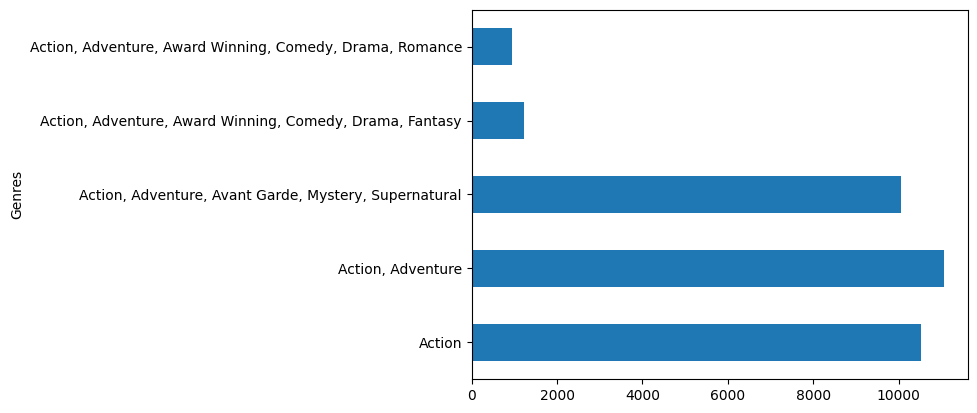

In [5]:
#Plotting Some EDA
df_new.groupby('Genres')['Popularity'].mean().head(5).plot(kind='barh')

In [6]:
def extract_all_values(list_items):
  '''This function is used extract genres from all the genres for a certain items'''
  all_genres = []
  for item in list_items:
    all = item.split(', ')
    for spec_item in all:
      if spec_item in all_genres:
        continue
      else:
        all_genres.append(spec_item)
  return all_genres
all_genres = extract_all_values(df_new['Genres'].tolist())

In [7]:
all_genres

['Action',
 'Award Winning',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Mystery',
 'Supernatural',
 'Fantasy',
 'Sports',
 'Comedy',
 'Romance',
 'Slice of Life',
 'Suspense',
 'Ecchi',
 'Gourmet',
 'Avant Garde',
 'Horror',
 'Girls Love',
 'Boys Love',
 'Hentai',
 'UNKNOWN',
 'Erotica']

In [13]:
df_new.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [14]:
def genre_check(row, string_value):
  '''This function allocates 1 value per each genre column'''
  placer = []
  all = row['Genres'].split(', ')
  for spec_item in all:
    if string_value in spec_item:
      placer=1
      break
    else:
      placer=0
  return placer

df_new['Action'] = df_new.apply(lambda row: genre_check(row,'Action'), axis=1)
df_new['Award_Winning'] = df_new.apply(lambda row: genre_check(row,'Award Winning'), axis=1)
df_new['Sci-Fi'] = df_new.apply(lambda row: genre_check(row,'Sci-Fi'), axis=1)
df_new['Drama'] = df_new.apply(lambda row: genre_check(row,'Drama'), axis=1)
df_new['Mystery'] = df_new.apply(lambda row: genre_check(row,'Mystery'), axis=1)
df_new['Supernatural'] = df_new.apply(lambda row: genre_check(row,'Supernatural'), axis=1)
df_new['Fantasy'] = df_new.apply(lambda row: genre_check(row,'Fantasy'), axis=1)
df_new['Sports'] = df_new.apply(lambda row: genre_check(row,'Sports'), axis=1)
df_new['Comedy'] = df_new.apply(lambda row: genre_check(row,'Comedy'), axis=1)
df_new['Romance'] = df_new.apply(lambda row: genre_check(row,'Romance'), axis=1)
df_new['Slice of Life'] = df_new.apply(lambda row: genre_check(row,'Slice of Life'), axis=1)
df_new['Suspense'] = df_new.apply(lambda row: genre_check(row,'Suspense'), axis=1)
df_new['Ecchi'] = df_new.apply(lambda row: genre_check(row,'Ecchi'), axis=1)
df_new['Gourmet'] = df_new.apply(lambda row: genre_check(row,'Gourmet'), axis=1)
df_new['Avant_Garde'] = df_new.apply(lambda row: genre_check(row,'Avant Garde'), axis=1)
df_new['Horror'] = df_new.apply(lambda row: genre_check(row,'Horror'), axis=1)
df_new['Girls Love'] = df_new.apply(lambda row: genre_check(row,'Girls Love'), axis=1)
df_new['Boys Love'] = df_new.apply(lambda row: genre_check(row,'Boys Love'), axis=1)
df_new['Erotica'] = df_new.apply(lambda row: genre_check(row,'Erotica'), axis=1)
df_new['UNKOWN'] = df_new.apply(lambda row: genre_check(row,'UNKOWN'), axis=1)

Creating LSTM to associate genres and synopsis relationship

In [15]:
! pip install nltk
! pip install gensim

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
documents = df_new['Synopsis'].tolist()
count_vectorizer = CountVectorizer(stop_words="english")
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)
names = df_new['Name']

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(
   doc_term_matrix,
   columns=count_vectorizer.get_feature_names_out(),index = names
)
print(cosine_similarity(df, df))